1.Open and display the image “dog.jpeg”. Convert the image intoa numpy array,

so that itcan beused in further processing.[Hint:Use the PIL module from python]

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from PIL import Image
dogs_data=Image.open('dogs.jpeg')

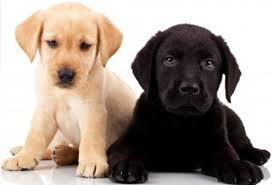

In [3]:
dogs_data

In [5]:
# Convert the image to a numpy array
image_array = np.array(dogs_data)

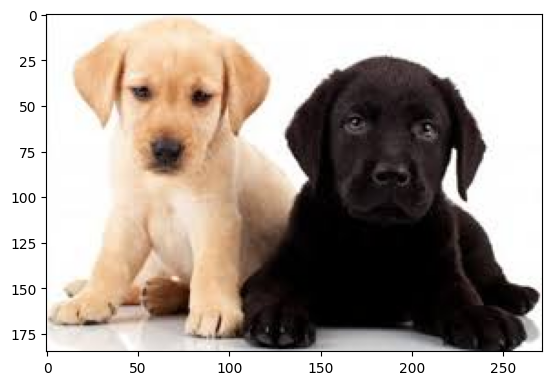

In [8]:
plt.imshow(image_array)


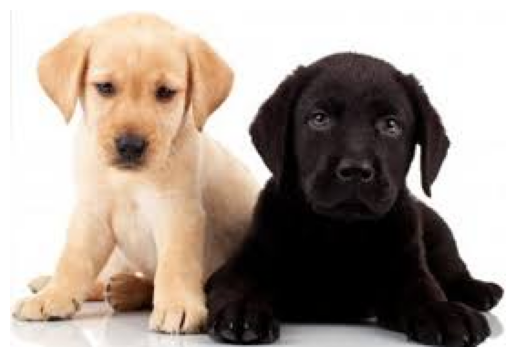

In [10]:
plt.imshow(image_array)
plt.axis('off')  # Turn off axes numbers and ticks
plt.show()

Find out the dimensions of the image and convert it intoa two-dimensional array.

In [11]:
image_array.shape


(185, 272, 3)

In [12]:
dogs_data.size

(272, 185)

In [13]:
image_array.size

150960

3.Use K-meansclustering with k set to 3 and cluster the image.[Hint: Refer to k-means module of scikit learn]

4.Predict the cluster label of every pixel in the image and plot it back as an image.

5.Find out the three dominant colorsin the image.[Hint: The cluster centers should correspond to three dominant colors]

In [14]:
from sklearn.cluster import KMeans

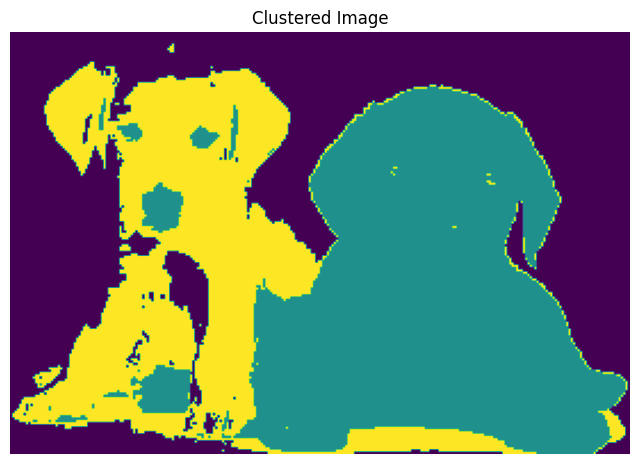

Dominant colors (RGB values):
[252 248 243]
[30 22 20]
[210 175 144]


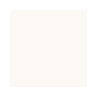

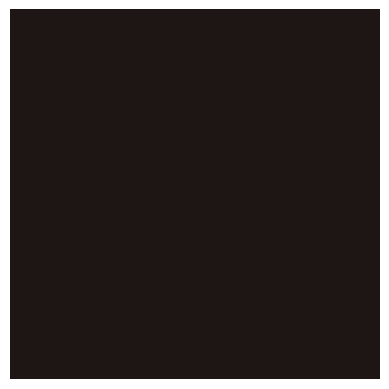

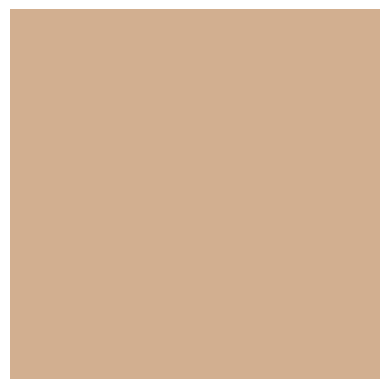

In [18]:
pixels = image_array.reshape(-1, 3)

# Perform K-means clustering
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0,n_init=1)
kmeans.fit(pixels)

# Predict cluster labels for each pixel
cluster_labels = kmeans.predict(pixels)

# Reshape the cluster labels to match the original image shape
clustered_image = cluster_labels.reshape(image_array.shape[:2])

# Plot the clustered image
plt.figure(figsize=(8, 6))
plt.imshow(clustered_image, cmap='viridis')  # You can choose a different colormap
plt.axis('off')
plt.title('Clustered Image')
plt.show()

# Get the cluster centers (dominant colors)
cluster_centers = kmeans.cluster_centers_

# Convert cluster centers to integer values
dominant_colors = cluster_centers.round().astype(int)

print("Dominant colors (RGB values):")
for color in dominant_colors:
    print(color)

# Display the dominant colors as swatches
plt.figure(figsize=(6, 1))
for color in dominant_colors:
    color_patch = np.zeros((100, 100, 3), dtype=np.uint8)
    color_patch[:, :, :] = color
    plt.imshow(color_patch)
    plt.axis('off')
    plt.show()
